In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score

In [2]:
glass = pd.read_csv('dati/glass.data.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff66f295160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff66ef9f588>]], dtype=object)

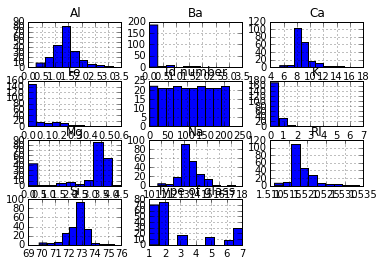

In [3]:
glass.hist()

In [4]:
glass.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [5]:
glass.drop('Id number', axis = 1, inplace=True)

In [6]:
X_train = glass.drop('Type of glass', axis = 1)
y_train = glass['Type of glass']

In [7]:
from sklearn.tree import DecisionTreeClassifier
trees = DecisionTreeClassifier()

In [8]:
trees.fit(X_train, y_train)
yhat = trees.predict(X_train)
pd.crosstab(yhat, y_train)

Type of glass,1,2,3,5,6,7
row_0,,,,,,
1,70,0,0,0,0,0
2,0,76,0,0,0,0
3,0,0,17,0,0,0
5,0,0,0,13,0,0
6,0,0,0,0,9,0
7,0,0,0,0,0,29


In [9]:
trees.score(X_train, y_train)

1.0

In [10]:
adult = pd.read_csv('dati/adult.csv')
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [11]:
def conversion_cat_to_numeric(col, data):
    for name in col:
        column = pd.Categorical.from_array(data[name])
        data[name] = column.codes

In [12]:
conversion_cat_to_numeric(["education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "workclass"], adult)

In [13]:
adult.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


There are three main ways to combat overfitting:

•"Prune" the tree after building to remove unneeded leaves.

•Use ensembling to blend the predictions of many trees.

•Restrict the depth of the tree while you're building it.

We'll explore all of these, but we'll look at the third method first.

By controlling how deep the tree can go while we build it, we keep the rules more general than they would be otherwise. This prevents the tree from overfitting.

We can restrict how deep the tree is built with a few parameters when we initialize the DecisionTreeClassifier class:

•max_depth -- this globally restricts how deep the tree can go.

•min_samples_split -- The minimum number of rows needed in a node before it can be split. For example, if this is set to 2, then nodes with 2 rows won't be split, and will become leaves instead.

•min_samples_leaf -- the minimum number of rows that a leaf must have.

•min_weight_fraction_leaf -- the fraction of input rows that are required to be at a leaf.

•max_leaf_nodes -- the maximum number of total leaves. This will cap the count of leaf nodes as the tree is being built.

As you can see, some of these parameters don't make sense together. Having max_depth and max_leaf_nodes together isn't allowed.



# Random Forest

In a random forest, each tree isn't trained using the whole dataset. Instead, it's trained on a random sample of the data, or a "bag". This sampling is performed with replacement. When we sample with replacement, after we select a row from the data we're sampling, we put the row back in the data so it can be picked again. Some rows from the original data may appear in the "bag" multiple times.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rfc = RandomForestClassifier()

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
rfc.score(X_train, y_train)

0.99065420560747663